In [66]:
import pandas as pd
import numpy as np

np.random.seed(42)

df = pd.read_csv('homepage_actions.csv')
df.head(),
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
timestamp    8188 non-null object
id           8188 non-null int64
group        8188 non-null object
action       8188 non-null object
dtypes: int64(1), object(3)
memory usage: 160.0+ KB


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [67]:
# total number of actions
a = df.groupby('action')
a.head(), a.count(), a.count().iloc[0,1]



(                     timestamp      id       group action
 0   2016-09-24 17:42:27.839496  804196  experiment   view
 1   2016-09-24 19:19:03.542569  434745  experiment   view
 2   2016-09-24 19:36:00.944135  507599  experiment   view
 3   2016-09-24 19:59:02.646620  671993     control   view
 4   2016-09-24 20:26:14.466886  536734  experiment   view
 8   2016-09-24 20:58:01.948663  349125  experiment  click
 12  2016-09-24 21:06:27.553057  601714  experiment  click
 15  2016-09-24 21:30:02.739756  487634  experiment  click
 17  2016-09-24 23:01:12.108316  468601  experiment  click
 21  2016-09-25 00:01:47.933853  555973  experiment  click,
         timestamp    id  group
 action                        
 click        1860  1860   1860
 view         6328  6328   6328,
 1860)

In [68]:
# number of unique users
df.groupby('id').count().__len__(), df.id.nunique()


(6328, 6328)

In [92]:
# size of control group and experiment group
df.groupby(['group','id']).head(10)


,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
5,2016-09-24 20:32:25.712659,681598,experiment,view
6,2016-09-24 20:39:03.248853,522116,experiment,view
7,2016-09-24 20:57:20.336757,349125,experiment,view
8,2016-09-24 20:58:01.948663,349125,experiment,click
9,2016-09-24 21:00:12.278374,560027,control,view


In [70]:
df.groupby(['group','id']).count().groupby('group').count()

,timestamp,action
group,,
control,3332,3332
experiment,2996,2996


### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [71]:
# duration of this experiment
df['timestamp'] = df['timestamp'].apply(lambda x: pd.Timestamp(x))
df = df.sort_values('timestamp')
df.loc[8187,'timestamp'] - df.loc[0,'timestamp'], (df.loc[8187,'timestamp'] - df.loc[0,'timestamp'])/(pd.Timedelta('30 days'))

(Timedelta('115 days 16:41:40.789831'), 3.8565203664471452)

In [72]:
# Experiment
pd.Timestamp('2014-12-12 23:59:59.999999999') + pd.Timedelta('1ns') -pd.Timestamp('2014-12-11')

Timedelta('2 days 00:00:00')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [73]:
# action types in this experiment
df.groupby('action').count()

,timestamp,id,group
action,,,
click,1860,1860,1860
view,6328,6328,6328


### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

Answer: Because we are required to have a proportionate view. Thats average click per view. As our aim is to increase average number of clicks per site visit or site view.

### 5. Define the click through rate (CTR) for this experiment.

Answer : No. of Clicks/No. of Views

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: CTRold >= CTRnew $$
$$H_1: CTRold  < CTRnew$$

In [74]:
# Finding Control Rate for Control Group
control_grp = df[df['group']=='control']

In [75]:
CTR_control_grp  = control_grp[control_grp.action == 'click'].id.nunique()/control_grp.id.nunique()
CTR_control_grp

0.2797118847539016

In [76]:
exper_grp = df[df['group']=='experiment']

In [77]:
CTR_exper_grp = exper_grp[exper_grp.action == 'click'].id.nunique()/exper_grp.id.nunique()
CTR_exper_grp

0.3097463284379172

In [78]:
obs_diff = CTR_exper_grp - CTR_control_grp
obs_diff

0.030034443684015644

In [79]:
control_grp.id.unique()

array([671993, 560027, 281985, ..., 795585, 505451, 461199], dtype=int64)

In [80]:
# Testing shape function
df.shape

(8188, 4)

In [81]:
ctr_List = []
for _ in range(1000):
    boot_sample = df.sample(df.shape[0], replace= True)
    control_gp = boot_sample.query("group == 'control'")    # OR
    control_gp = boot_sample[boot_sample['group']== 'control']
    exper_gp = boot_sample.query("group == 'experiment'")  
    ctr_contrl = control_gp.query('action =="click"').id.nunique()/control_gp.id.nunique()
    ctr_exper = exper_gp.query('action =="click"').id.nunique()/exper_gp.id.nunique()
    ctr_diff = ctr_exper - ctr_contrl
    ctr_List.append(ctr_diff)


In [82]:
timeit 1==1


51 ns ± 8.24 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [83]:
ctr_List = np.array(ctr_List)

In [84]:
import matplotlib.pyplot as plt

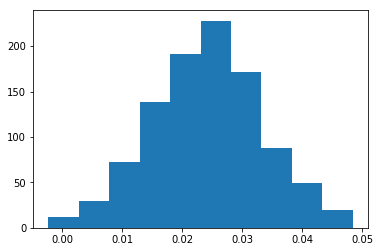

In [85]:
%matplotlib inline
plt.hist(ctr_List);

In [86]:
 normal_dist = np.random.normal(0,ctr_List.std(), ctr_List.size)

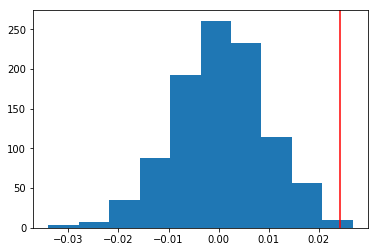

In [87]:
plt.hist(normal_dist);
plt.axvline( ctr_List.mean(),color= 'red')

In [90]:
# Calculating p-value
(normal_dist > obs_diff).mean()

0.0